1. Построить график и локализовать область поиска экстремума отрезком [a, b] длины не более 2.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import sympy

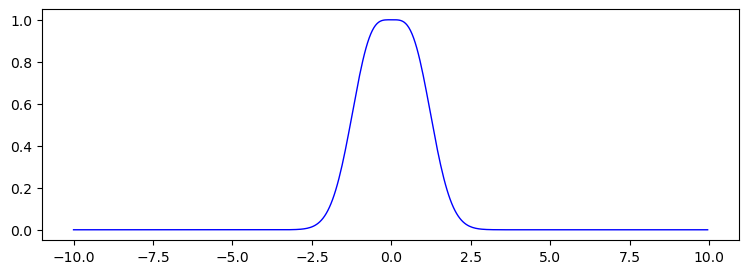

In [2]:
# Функция №1
def f1(a, b, step):
    x = np.arange(a, b, step)
    y = (1 + x ** 2) * np.exp(-x ** 2)
    return x, y
plt.figure(figsize = (9, 3)) # создаем полотно
x, y = f1(-10, 10, 0.05) # разбиваем отрезок на части
plt.plot(x, y, lw = 1, c = 'b', ls = '-') # выводим график

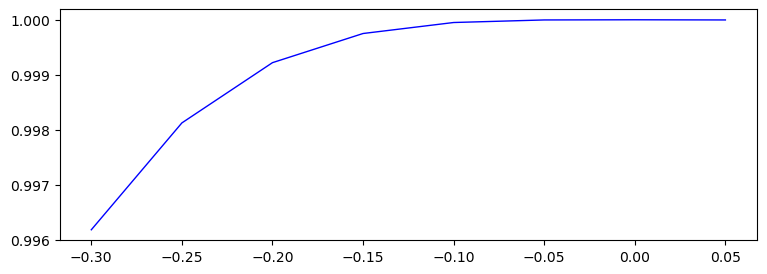

In [3]:
# Локализованная область: [a, b] = [-0.3, 0.1]

# Функция №1
plt.figure(figsize = (9, 3)) # создаем полотно
x, y = f1(-0.3, 0.1, 0.05) # разбиваем отрезок на части
plt.plot(x, y, lw = 1, c = 'b', ls = '-') # выводим график

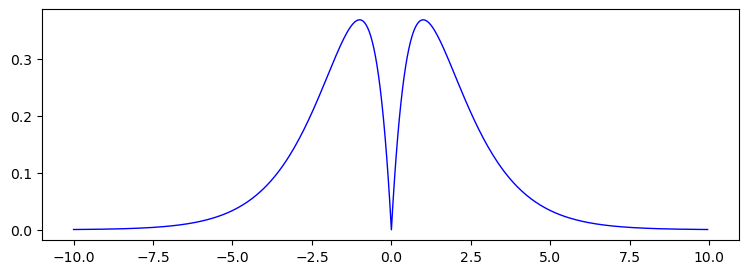

In [4]:
# Функция №2
def f2(a, b, step):
    x = np.arange(a, b, step)
    y = np.abs(x) * np.exp(-np.abs(x))
    return x, y
plt.figure(figsize = (9, 3)) # создаем полотно
x, y = f2(-10, 10, 0.05) # разбиваем отрезок на части
plt.plot(x, y, lw = 1, c = 'b', ls = '-') # выводим график

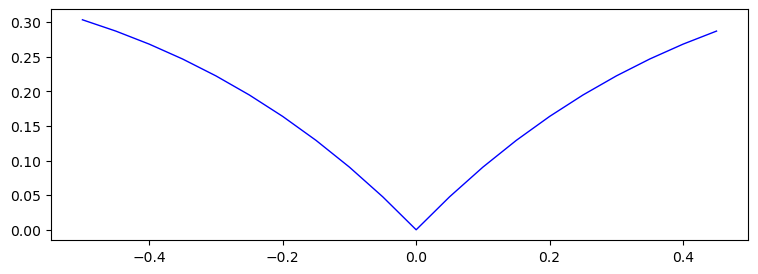

In [5]:
# Локализованная область: [a, b] = [-0.5, 0.5]

# Функция №2
plt.figure(figsize = (9, 3)) # создаем полотно
x, y = f2(-0.5, 0.5, 0.05) # разбиваем отрезок на части
plt.plot(x, y, lw = 1, c = 'b', ls = '-') # выводим график

2. Уточнить положение точки экстремума до точности eps = 0.0001.

In [6]:
# Функция для нахождения значения функции №1 в точке x 
def func1(x):
    return (1 + x ** 2) * math.exp(-x ** 2)

In [7]:
# Метод дихотомии
a = -0.3
b = 0.1
eps = 0.0001

k = 0 # количество итераций
while abs(b - a) > eps:
    x = (a + b) / 2
    d = (b - a) / 2
    if func1(x - d) <= func1(x + d):
        a = x
    else:
        b = x
    k = k + 1
x = (a + b) / 2
f = func1(x)
print('Локальный максимум достигается в точке ', x, ' и равен ', f)
print('Количество итераций равно ', k)
print('Фактическая погрешность равна ', abs(0 - x))

Локальный максимум достигается в точке  4.8828125000006935e-05  и равен  1.0
Количество итераций равно  12
Фактическая погрешность равна  4.8828125000006935e-05


In [8]:
# Метод золотого сечения
a = -0.3
b = 0.1
eps = 0.0001
phi = (1 + math.sqrt(5)) / 2

k = 0 # количество итераций

while abs(b - a) > eps:
    x1 = b - (b - a) / phi
    x2 = a + (b - a) / phi
    if func1(x1) <= func1(x2):
        a = x1
    else:
        b = x2
    k = k + 1
x = (a + b) / 2
f = func1(x)
print('Локальный максимум достигается в точке ', x, ' и равен ', f)
print('Количество итераций равно ', k)
print('Фактическая погрешность равна ', abs(0 - x))

Локальный максимум достигается в точке  5.1921081513684745e-05  и равен  1.0
Количество итераций равно  18
Фактическая погрешность равна  5.1921081513684745e-05


In [9]:
# Метод средней точки

a = -0.3
b = 0.1
eps = 0.0001

k = 1 # количество итераций
x0 = (a + b) / 2.0

# Нахождение производной
x = sympy.symbols('x')
df = sympy.diff((1 + x ** 2) * sympy.exp(-x ** 2))
#print(df)
# Вычисление производной в точке x0
result = df.subs(x, x0)
#print(result)
while abs(result) >= eps:
    if result > 0:
        a = x0;
    else:
        b = x0;
    x0 = (a + b) / 2.0
    # Вычисление производной в точке x0
    result = df.subs(x, x0)
    k += 1
f = func1(x0)
print('Локальный максимум достигается в точке ', x0, ' и равен ', f)
print('Количество итераций равно ', k)
print('Фактическая погрешность равна ', abs(0 - x0))

Локальный максимум достигается в точке  6.938893903907228e-18  и равен  1.0
Количество итераций равно  2
Фактическая погрешность равна  6.938893903907228e-18


In [12]:
# Метод хорд

a = -0.3
b = 0.1
eps = 0.0001

k = 1 # количество итераций

# Нахождение первой производной
x = sympy.symbols('x')
df = sympy.diff((1 + x ** 2) * sympy.exp(-x ** 2))

# Вычисление первой производной в точке x0
df_a = df.subs(x, a) 
if df_a >= 0: # Функция неубывающая, следовательно, неподвижная точка b
    x0 = a
    z = b
else: # Функция невозрастающая, следовательно, неподвижная точка a
    x0 = b
    z = a
df_z = df.subs(x, z)
df_x0 = df.subs(x, x0)
while abs(df_x0) >= eps:
    x0 = x0 - df_x0 * (x0 - z) / (df_x0 - df_z)
    df_x0 = df.subs(x, x0)
    k += 1

f = func1(x0)
print('Локальный максимум достигается в точке ', x0, ' и равен ', f)
print('Количество итераций равно ', k)
print('Фактическая погрешность равна ', abs(0 - x0))

Локальный максимум достигается в точке  0.0340460649501986  и равен  0.999999328722470
Количество итераций равно  7
Фактическая погрешность равна  0.0340460649501986


In [11]:
# Метод Ньютона (метод касательных)

a = -0.3
b = 0.1
eps = 0.0001

k = 1 # количество итераций

# Нахождение первой и второй производных
x = sympy.symbols('x')
df = sympy.diff((1 + x ** 2) * sympy.exp(-x ** 2))
df2 = sympy.diff(df)

# Вычисление первой производной в точке x0
df_a = df.subs(x, a) 
if df_a >= 0: # Функция неубывающая, следовательно, строим касательную в точке a
    x0 = a
else: # Функция невозрастающая, следовательно, строим касательную в точке b
    x0 = b
df_x0 = df.subs(x, x0)
df2_x0 = df2.subs(x, x0)
while abs(df_x0) >= eps:
    x0 = x0 - df_x0 / df2_x0
    df_x0 = df.subs(x, x0)
    df2_x0 = df2.subs(x, x0)
    k += 1

f = func1(x0)
print('Локальный максимум достигается в точке ', x0, ' и равен ', f)
print('Количество итераций равно ', k)
print('Фактическая погрешность равна ', abs(0 - x0))

Локальный максимум достигается в точке  -0.0249345696123248  и равен  0.999999806804278
Количество итераций равно  7
Фактическая погрешность равна  0.0249345696123248


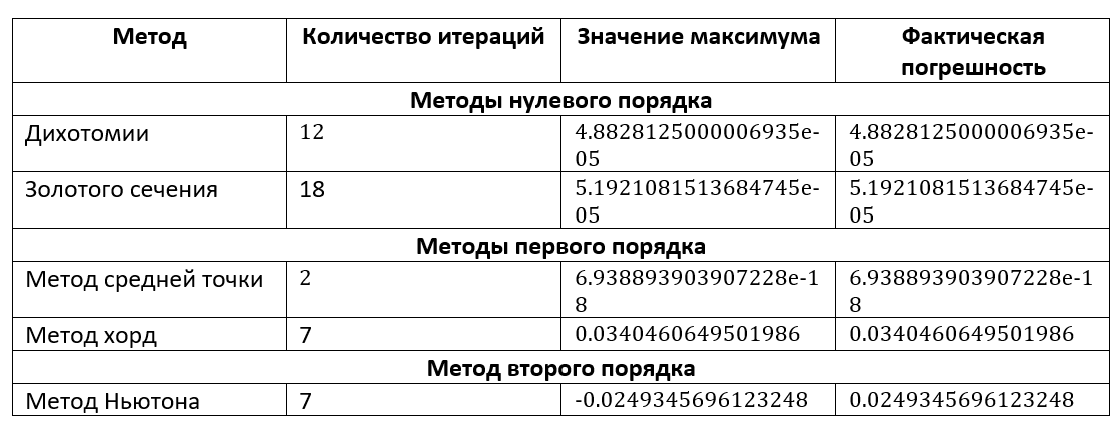